# Week 7: Intro to Simple Machine Learning Models

This week introduces three core machine learning models using `scikit-learn`:  
- Linear Regression (for regression tasks)  
- Decision Tree Classifier (for classification)  
- Logistic Regression (for classification)

---

## Learning Objectives

- Understand the supervised learning pipeline
- Train, test, and evaluate classification and regression models
- Interpret model performance using accuracy or mean squared error
- Visualize decision tree structures
- Use scikit-learn's API to implement models

---

## Topics Covered

### 1. Supervised Learning Basics
- Features (`X`) and target (`y`)
- Train-test split using `train_test_split`
- Model training and prediction
- Evaluation using accuracy or mean squared error

---

## Models Introduced

### 🔹 Linear Regression
- Predicts a continuous numerical value
- Fits a line to minimize squared error
- Metric: `mean_squared_error`

### 🔹 Decision Tree Classifier
- Learns decision rules from features
- Easy to visualize and interpret
- Metric: `accuracy_score`

### 🔹 Logistic Regression
- Used for binary classification
- Predicts probabilities, then thresholds to output class labels
- Metric: `accuracy_score`

---

## Hands-On Tasks

Use the following datasets:
- Synthetic or numeric dataset (for regression)
- Iris(for classification models)
---


### 🔹 Linear Regression
- Predicts a continuous numerical value
- Fits a line to minimize squared error
- Metric: `mean_squared_error`
- [Linear Regression 2D Image](https://web.stanford.edu/class/stats202/notes/Linear-regression/Simple-linear-regression.html)

In [21]:
# !pip install sklearn
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("HDB_dataset.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6000 non-null   int64  
 1   resale_price                 6000 non-null   float64
 2   floor_area_sqm               6000 non-null   float64
 3   Remaining_lease              6000 non-null   int64  
 4   Dist_nearest_station         6000 non-null   float64
 5   Dist_nearest_primary_school  6000 non-null   float64
 6   Dist_nearest_GHawker         6000 non-null   float64
 7   Dist_CBD                     6000 non-null   float64
 8   flat_type_category           6000 non-null   object 
 9   storey_category              6000 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 468.9+ KB


In [23]:
data.head()

,Unnamed: 0,resale_price,floor_area_sqm,Remaining_lease,Dist_nearest_station,Dist_nearest_primary_school,Dist_nearest_GHawker,Dist_CBD,flat_type_category,storey_category
0,0,395000.0,84.0,67,1.008453,0.447115,0.482185,6.717383,flat_type_4.ROOM,storey_range_01.TO.03
1,1,675000.0,146.0,66,1.176052,0.188651,1.930232,15.699330,flat_type_EXECUTIVE,storey_range_10.TO.12
2,2,413000.0,101.0,77,0.460362,0.220392,3.662314,12.824040,flat_type_4.ROOM,storey_range_13.TO.15
3,3,350000.0,64.0,65,0.682939,0.260424,0.676288,6.830667,flat_type_3.ROOM,storey_range_01.TO.03
4,4,728000.0,123.0,76,0.673447,0.127896,0.972390,7.998324,flat_type_5.ROOM,storey_range_07.TO.09


### Create a Linear Regression Model to predict price of house
Steps:
1) Decide which features you want to use
2) Split the data into Train(80%) and Test(20%)
3) Model training and Prediction
4) Evaulation

In [ ]:
features = [
"floor_area_sqm"] #step1


In [26]:
# Step 2: Split data into Train and Test
from sklearn.model_selection import train_test_split

# X = features, y = target
X = data[features]        # feature columns
y = data["resale_price"]         # target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 15577694477.168163


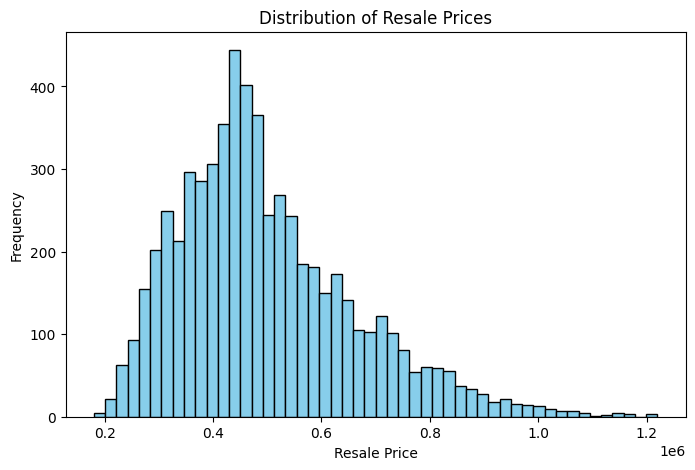

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(data["resale_price"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Resale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Resale Prices")
plt.show()

# Realising that the Distribution of Resale Prices are not Normal, but rather Right Skewed
# We need to "log" the resale prices 

In [34]:
import numpy as np
data["log_resale_price"] = np.log1p(data["resale_price"]) # Log the data for better input

# X = features, y = target
X = data[features]        # feature columns
y = data["log_resale_price"]         # target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0532915678926411


## Classification Models

### 🔹 Decision Tree Classifier
- Learns decision rules from features
- Easy to visualize and interpret
- Metric: `accuracy_score`

In [36]:
data = pd.read_csv("iris_synthetic_data.csv")
data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


In [37]:
data["label"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
# Step 1: Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Prepare features and target
X = data[["sepal length", "sepal width", "petal length", "petal width"]]  # features
y = data["label"]  # target label

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree
decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = decision_tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9866666666666667
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       217
Iris-versicolor       1.00      0.96      0.98       197
 Iris-virginica       0.96      1.00      0.98       186

       accuracy                           0.99       600
      macro avg       0.99      0.99      0.99       600
   weighted avg       0.99      0.99      0.99       600



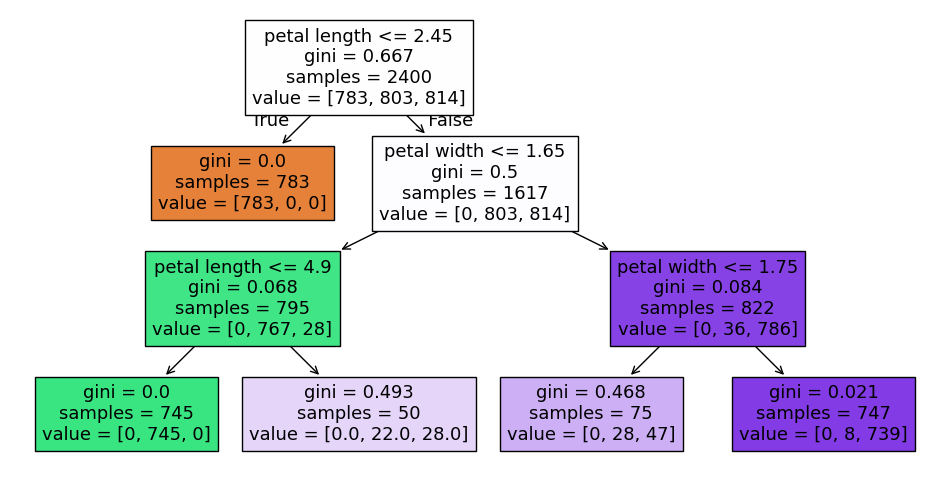

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(decision_tree_model, feature_names=X.columns, filled=True)
plt.show()


### 🔹 Logistic Regression
- Used for binary classification
- Predicts probabilities, then thresholds to output class labels
- Metric: `accuracy_score`
- [Logistic Regression 2D Image](https://medium.com/@praveenraj.gowd/why-is-logistic-regression-called-logistic-regression-and-not-a-logistic-classification-5a418293040d)

In [65]:
data = pd.read_csv("Titanic-Dataset.csv")

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Clean and prepare the data
# Encode 'Sex': male = 0, female = 1
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# Drop rows with missing Age values
data = data[["Sex", "Age", "Survived"]].dropna()

# Step 2: Define features and target
X = data[["Sex", "Age"]]     # Features
y = data["Survived"]         # Target

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7342657342657343

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        87
           1       0.67      0.64      0.65        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143



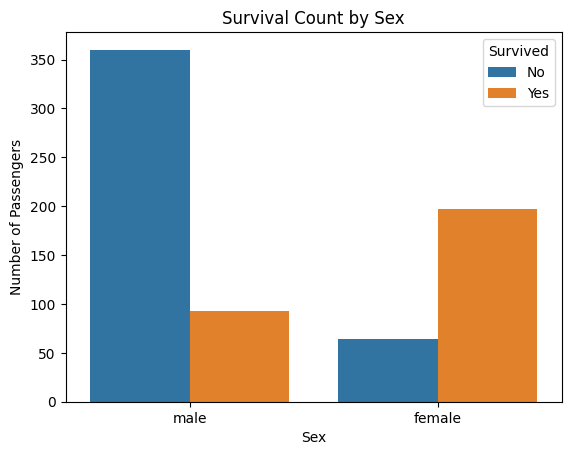

In [69]:
plot_data = data.copy()
plot_data["Sex"] = plot_data["Sex"].map({0: "male", 1: "female"})

sns.countplot(x="Sex", hue="Survived", data=plot_data)
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


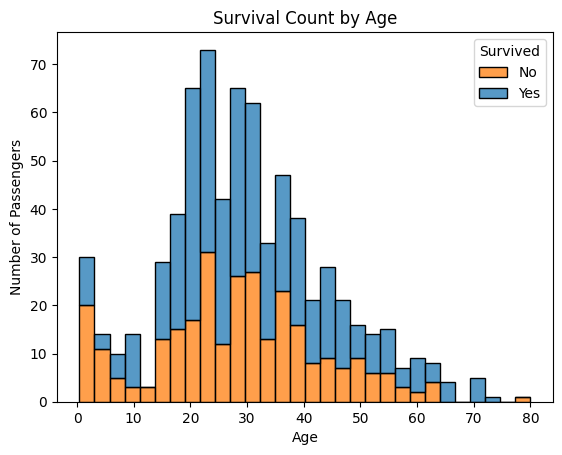

In [73]:
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack", bins=30)
plt.title("Survival Count by Age")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()
